Reeha Parkar
> AIML - 2 

> 60001180046

**Aim - To demostrate Multiple Linear Regression on Admission_Predict data set using scikit-learn**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
adm = pd.read_csv('Admission_Predict.csv')
adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X = adm[['GRE Score', 'CGPA']]
print(X.shape)
Y = adm['Chance of Admit '].values.reshape(-1, 1)
print(Y.shape)

(400, 2)
(400, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # random.seed(one value) and random.random() ka number will be same every time
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 2)
(80, 2)
(320, 1)
(80, 1)


**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# To retrieve the intercept:
print(lin_model.intercept_)
# For retrieving the slope:
print(lin_model.coef_)

[-1.6165052]
[[0.00299447 0.16187588]]


In [ ]:
y_pred = lin_model.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual':Y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.71,0.694444
1,0.70,0.697924
2,0.79,0.777725
3,0.73,0.636897
4,0.72,0.742924
...,...,...
75,0.61,0.642157
76,0.69,0.653085
77,0.62,0.685378
78,0.93,0.927944


In [ ]:
df1 = df.head(25)

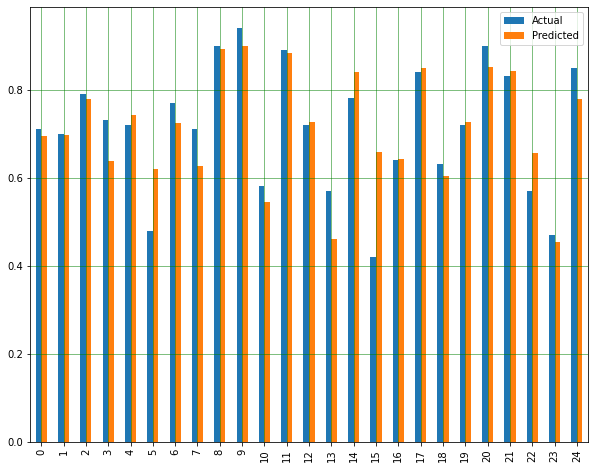

In [ ]:
df1.plot(kind='bar', figsize=(10, 8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
accuracy = lin_model.score(X_test, Y_test)
print(accuracy)

Mean Absolute Error:  0.05230482952670036
Mean Squared Error:  0.005460858389766664
Root Mean Squared Error:  0.07389762100207735
0.6994158202067167


(2, 44) (2, 44)
[0.00299447]
(2, 44)


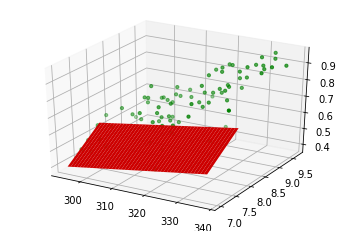

In [ ]:
plt3d = plt.figure().gca(projection='3d')
X1 = np.array(X_test['GRE Score'])
X2 = np.array(X_test['CGPA'])
plt3d.scatter(np.array(X1), np.array(X2), np.array(Y_test[:,0]), color='g', s=10)

i = int(min(X1))
j = int(max(X1))
k = int(min(X2))
l = int(max(X2))
xx1, xx2 = np.meshgrid(range(i, j), range(k, l))

print(xx1.shape, xx2.shape)
print(lin_model.coef_[:,0])
P = lin_model.intercept_ + lin_model.coef_[:,0]*xx1 + lin_model.coef_[:,1]*xx2
print(P.shape)
plt3d.plot_surface(xx1, xx2, P, color='r')
plt.show()
